# Trabajo final de minería de datos

El objetivo de esta actividad es relacionar los temas vistos en el curso a través de su
aplicación en la resolución de un caso concreto.
Si no dispone de un juego de datos propio para analizar, puede consultar los siguientes
repositorios:

* UCI (http://mlr.cs.umass.edu/ml/)
* Kaggle (https://www.kaggle.com/datasets)
* KEEL (https://sci2s.ugr.es/keel/datasets.php)

Una vez elegido el conjunto de datos, deberá desarrollar un conjunto de hipótesis sobre el
mismo que luego podrá evaluar con las técnicas vistas.
Se espera que aplique 2 (dos) de las técnicas vistas en el curso para resolver algún aspecto
del problema. Dichas técnicas son: **Técnicas de agrupamiento (clustering), Clasificador
Naive Bayes, Arboles de clasificación, Reglas de clasificación, Reglas de asociación y Redes
Neuronales**.

Deberá entregar un informe detallando para cada técnica utilizada:
- El tipo de problema a resolver (descriptivo o predictivo)
- El procesamiento realizado sobre los datos y el efecto que dicho procesamiento
tiene en las distribuciones originales.
- El modelo obtenido.
- La interpretación/explicación de los resultados obtenidos.

In [47]:
import pandas as pd

Cargo un archivo csv, creado a partir de los accesos al servidor de apache de SEDICI, correspondientes a un día entero. 

In [48]:
df = pd.read_csv('data/access-log.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40912 entries, 0 to 40911
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ip          40912 non-null  object 
 1   identd      0 non-null      float64
 2   user        0 non-null      float64
 3   time        40912 non-null  object 
 4   request     40912 non-null  object 
 5   status      40912 non-null  float64
 6   size        40912 non-null  float64
 7   Referer     13814 non-null  object 
 8   User_agent  40765 non-null  object 
dtypes: float64(4), object(5)
memory usage: 2.8+ MB


Quito columnas que tienen todos sus valores nulos

In [49]:
df = df.drop(['identd', 'user'], axis=1)

Convierto tipos de datos

In [50]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40912 entries, 0 to 40911
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ip          40912 non-null  string
 1   time        40912 non-null  string
 2   request     40912 non-null  string
 3   status      40912 non-null  Int64 
 4   size        40912 non-null  Int64 
 5   Referer     13814 non-null  string
 6   User_agent  40765 non-null  string
dtypes: Int64(2), string(5)
memory usage: 2.3 MB


Reemplazo valores nulos en User_agent con el texto 'NOTSET'

In [51]:
df['User_agent'] = df['User_agent'].fillna(value='NULL')
df['Referer'] = df['Referer'].fillna(value='NULL')

In [52]:
df.head(5)

,ip,time,request,status,size,Referer,User_agent
0,54.36.148.250,2021-11-08 00:00:14-03:00,GET /bitstream/handle/10915/37522/Tesis%20Igna...,200,4737,NULL,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...
1,189.151.64.47,2021-11-08 00:00:12-03:00,GET /bitstream/handle/10915/107834/Tesis_Docto...,200,4363,http://sedici.unlp.edu.ar/handle/10915/107834,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
2,54.85.17.105,2021-11-08 00:00:14-03:00,GET /handle/10915/127606 HTTP/1.1,200,9584,NULL,Unpaywall (http://unpaywall.org/; mailto:team@...
3,54.36.148.250,2021-11-08 00:00:14-03:00,GET /bitstream/handle/10915/37522/Tesis%20Igna...,200,4737,NULL,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...
4,189.151.64.47,2021-11-08 00:00:12-03:00,GET /bitstream/handle/10915/107834/Tesis_Docto...,200,4363,http://sedici.unlp.edu.ar/handle/10915/107834,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...


Habria que:
1. Agrupar por ips
2. agregar una columna de si se declara como bot o no
3. detectar request beneficiosos? a partir de alguna regex, o algo similar, que devuelva los requests que hacen visitias o descargas de itemes, descartando vista de search (que no nos interesan tanto que sean indexadas) o una metrica que sea 

"cantidad de accesos buenos"/"cantidad de accesos en el dia"

4. ver reglas de fail2ban para detecatar bots malicisos
5. ver como dspace detecta bots en [SpiderDetectorServiceImpl.java](https://github.com/DSpace/DSpace/blob/main/dspace-api/src/main/java/org/dspace/statistics/util/SpiderDetectorServiceImpl.java)
6. whois por ips

Para leer
* [uno de fp-growth](https://towardsdatascience.com/fp-growth-frequent-pattern-generation-in-data-mining-with-python-implementation-244e561ab1c3) y [otro de fp-growth](https://towardsdatascience.com/understand-and-build-fp-growth-algorithm-in-python-d8b989bab342)
* [processing apache access-log with k-means clustering algorithm](https://www.joe0.com/2017/02/12/processing-apache-access-log-with-k-means-clustering-algorithm/) y [applying big data analytics to logging](https://www.joe0.com/2017/02/05/applying-big-data-analytics-to-logging/)
* [k-means en python paso a paso](https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/) y [7 pasos machine learning construir maquina](https://www.aprendemachinelearning.com/7-pasos-machine-learning-construir-maquina/)

In [53]:
print(df.size)
print(df[df["User_agent"].str.contains('googlebot.com|google.com', na=False)].size)

286384
25312


In [54]:
import requests, json
url = requests.get("https://developers.google.com/search/apis/ipranges/googlebot.json")
text = url.text
data = json.loads(text)

Ver como hizo https://blog.majsky.cz/detecting-google-bot-python-and-django/

In [55]:
import ipaddress
ipaddress.ip_address('192.168.0.1') in ipaddress.ip_network('66.249.79.224/27')

False

K-Means a partir del tamaño de los requests

In [56]:
df_groupby_ip = df.groupby('ip', as_index=False).size()
df_groupby_ip = df_groupby_ip.rename(columns={'size':'count'})
df_groupby_ip['size'] = df.groupby('ip', as_index=False)['size'].sum()['size']
df_groupby_ip

,ip,count,size
0,1.181.155.221,2,7488973
1,1.231.29.243,5,52541
2,1.80.170.113,48,1149826
3,100.26.241.232,3,32297
4,100.26.3.190,6,1753001
...,...,...,...
9077,96.75.243.153,1,1083576
9078,98.196.145.178,1,1369628
9079,98.33.218.211,2,12680
9080,99.30.181.252,3,1385250


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [58]:
df_groupby_ip

,ip,count,size
0,1.181.155.221,2,7488973
1,1.231.29.243,5,52541
2,1.80.170.113,48,1149826
3,100.26.241.232,3,32297
4,100.26.3.190,6,1753001
...,...,...,...
9077,96.75.243.153,1,1083576
9078,98.196.145.178,1,1369628
9079,98.33.218.211,2,12680
9080,99.30.181.252,3,1385250


Escalo datos

In [59]:
scaler = MinMaxScaler().fit(df_groupby_ip[['count','size']].values)

In [60]:
df_cluster = pd.DataFrame(scaler.transform(df_groupby_ip[['count','size']].values),
                       columns=["cantidad", "tamaño"])

In [61]:
df_cluster

,cantidad,tamaño
0,0.000364,0.002907
1,0.001454,0.000020
2,0.017085,0.000446
3,0.000727,0.000012
4,0.001818,0.000680
...,...,...
9077,0.000000,0.000421
9078,0.000000,0.000532
9079,0.000364,0.000005
9080,0.000727,0.000538


In [62]:
kmeans = KMeans(n_clusters=5).fit(df_cluster.values)

In [63]:
df_cluster["cluster"] = kmeans.labels_

Dibujo

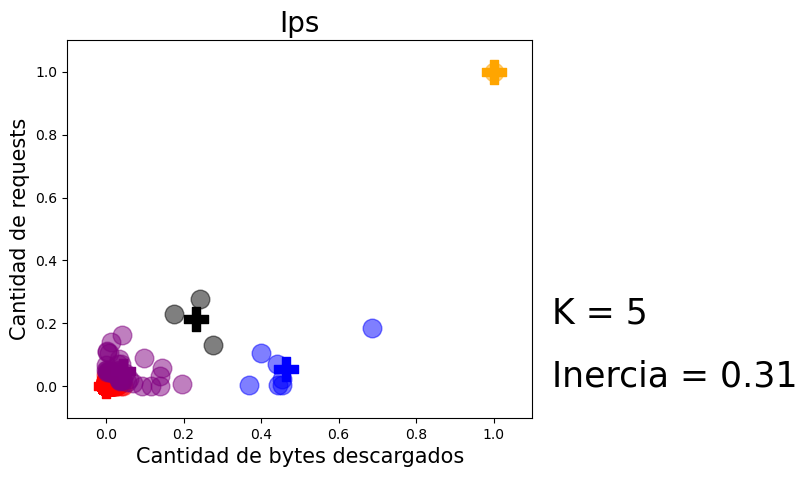

In [64]:
plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(df_cluster[df_cluster["cluster"] == cluster]["cantidad"],
                df_cluster[df_cluster["cluster"] == cluster]["tamaño"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1], 
                marker="P", s=280, color=colores[cluster])

plt.title("Ips", fontsize=20)
plt.xlabel("Cantidad de bytes descargados", fontsize=15)
plt.ylabel("Cantidad de requests", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)    
plt.show()



es bot o no
* clasificar, entrenar, score
* volver a clasificar de otra manera, entrenar, score

comportamiento abusivo
* 

autopersive
* 

Ver DavidBouldin o Silouethe
Usar los clusters como etiquetas y hacer kmeans

https://python-bloggers.com/2021/06/davies-bouldin-index-for-k-means-clustering-evaluation-in-python/
https://medium.com/mlearning-ai/deciding-number-of-clusters-using-gap-statistics-davies-bouldin-index-calinski-harabasz-index-2ce9acfb6118


In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [66]:
df_cluster

,cantidad,tamaño,cluster
0,0.000364,0.002907,0
1,0.001454,0.000020,0
2,0.017085,0.000446,0
3,0.000727,0.000012,0
4,0.001818,0.000680,0
...,...,...,...
9077,0.000000,0.000421,0
9078,0.000000,0.000532,0
9079,0.000364,0.000005,0
9080,0.000727,0.000538,0


In [67]:
results = {}
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(df_cluster)
    db_index = davies_bouldin_score(df_cluster, labels)
    results.update({i: db_index})

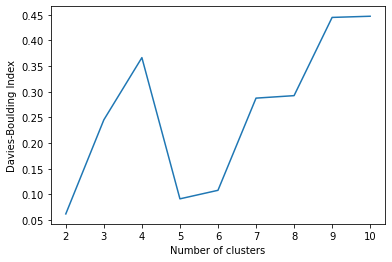

In [68]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

In [69]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    df_cluster[["cantidad", "tamaño"]],
    df_cluster["cluster"], 
    test_size=0.30)


0.9996330275229358
|--- cantidad <= 0.03
|   |--- tamaño <= 0.04
|   |   |--- class: 0
|   |--- tamaño >  0.04
|   |   |--- class: 4
|--- cantidad >  0.03
|   |--- cantidad <= 0.22
|   |   |--- tamaño <= 0.20
|   |   |   |--- tamaño <= 0.01
|   |   |   |   |--- cantidad <= 0.05
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- cantidad >  0.05
|   |   |   |   |   |--- class: 4
|   |   |   |--- tamaño >  0.01
|   |   |   |   |--- class: 4
|   |   |--- tamaño >  0.20
|   |   |   |--- class: 3
|   |--- cantidad >  0.22
|   |   |--- tamaño <= 0.12
|   |   |   |--- class: 1
|   |   |--- tamaño >  0.12
|   |   |   |--- cantidad <= 0.64
|   |   |   |   |--- class: 3
|   |   |   |--- cantidad >  0.64
|   |   |   |   |--- class: 2



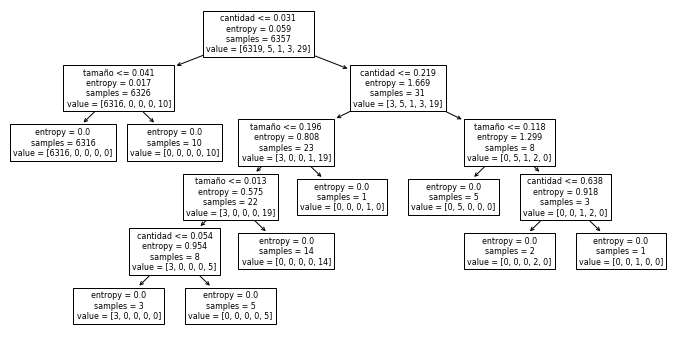

In [70]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy")

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

print(tree.export_text(arbol,
                      feature_names=["cantidad", "tamaño"]))
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, 
              feature_names=["cantidad", "tamaño"])
plt.show()

